# Laboratorul 5

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
PI = np.pi

## Exercițiul 1

Prespuneți că într-o incintă temperatura este controlată astfel încât să se obțină o periodicitate noapte-zi asemănătoare unei sinusoide; maximul de temperatură ($1^{\circ} \text{C}$) se atinge la ora 12:00, minimul ($-1^{\circ} \text{C}$) la ora 24:00, nu există variații între zile. Începeți să măsurați temperatura din incintă într-o zi de miercuri, la ora 12:00.

a) Dacă măsurați temperatura la fiecare 2 ore, care va fi **frecvența de eșantionare** (exprimată **în Hz**)?

In [12]:
frecventa_esantionare = 1 / (2*60*60)
print("frecventa esantionare: ", frecventa_esantionare)

frecventa esantionare:  0.0001388888888888889


b) Care este **perioada** semnalului de temperatură și care este **frecvența** acestuia? Este eșantionarea din subpunctul precedent **corectă** în sensul teoremei Nyquist? Care este intervalul de perioada maximă la care trebuie măsurată temperatura astfel încât să îndeplinească criteriul de eșantionare Nyquist?

In [13]:
perioada = 24 * 60 * 60 # 24h
frecventa = 1 / perioada
print("perioada: ", perioada)
print("frecventa: ", frecventa)

print("esantionare corecta Nyquist? ", "DA" if frecventa_esantionare >= 2*frecventa else "NU")

# perioada maxima = frecventa minima
# pt ca perioada = 1/frecventa
frecventa_esantionare_minima = 2*frecventa
perioada_maxima = 1 / frecventa_esantionare_minima
print("perioada maxima Nyquist: ", perioada_maxima, "s = ", perioada_maxima / 60, "min = ", perioada_maxima / 3600, "h")

perioada:  86400
frecventa:  1.1574074074074073e-05
esantionare corecta Nyquist?  DA
perioada maxima Nyquist:  43200.0 s =  720.0 min =  12.0 h


c) Afișați **grafic** cu o curbă sinusoida de temperatură pentru o săptămână și eșantioanele (semnalate grafic prin puncte) obținute cu frecvența de eșantionare de la punctul (a). Afișați conținutul variabilei în care rețineți axa timpului.

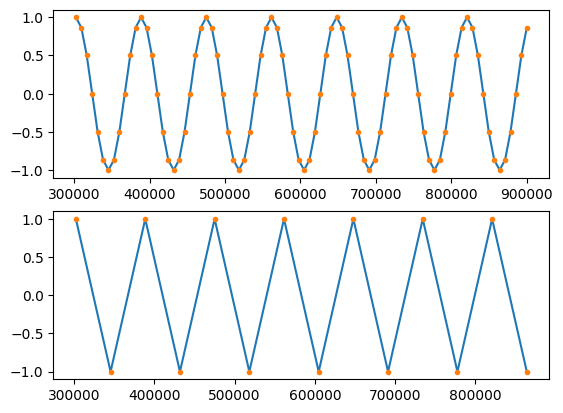

In [14]:
amp = 1 # de la -1 la 1
faza = -PI/2 # la ora 24:00 = 00:00 functia este -1
start = 3.5* 24*60*60 #ziua 3 -> miercuiri .5-> ora 12
stop = (3.5+ 7) * 24*60*60 #7 zile intr-o saptamana
# pas = 2*60*60 # 1 zi = 24h    

nts = np.arange(start, stop, 1/frecventa_esantionare)
temp = amp * np.sin(2*PI * frecventa * nts + faza)

nts_es_min = np.arange(start, stop, 1/frecventa_esantionare_minima)
temp_es_min = amp * np.sin(2*PI * frecventa * nts_es_min + faza)

fig, axs = plt.subplots(2)
axs[0].plot(nts, temp)
axs[0].plot(nts, temp, ".")
axs[1].plot(nts_es_min, temp_es_min)
axs[1].plot(nts_es_min, temp_es_min, ".")

d) Dacă măsurați temperatura **o dată la 5 ore**, în ce zi și la ce oră veți obține **din nou** valoarea din primul eșantion (cel de miercuri, ora 12:00)?

In [15]:
# valoare se obtine o data la 24 h
# masuram din 5 in 5 ore
# CMMMC este 5*24 ore pana la acelasi reziltat
print(5*24, "ore")


# the hard way:
perioada_5zile = 5*60*60

temp = []
nts = []

ts = start
target_temp = amp * np.sin(2*PI * frecventa * ts + faza)
temp.append(target_temp)
nts.append(ts)

ts = start + perioada_5zile
crr_temp = amp * np.sin(2*PI * frecventa * ts + faza)
temp.append(crr_temp)
nts.append(ts)

while crr_temp != target_temp:
    ts = ts + perioada_5zile
    crr_temp = amp * np.sin(2*PI * frecventa * ts + faza)
    temp.append(crr_temp)
    nts.append(ts)

# seconds to days


print( ((nts[-1] - nts[0]) / 3600 / 24), "zile")

120 ore
5.0 zile


e) Generați eșantioanele pentru **noua perioadă de eșantionare** (5 ore). Afișați-le pe un nou grafic folosind funcția `plt.plot()`. Ce observați?

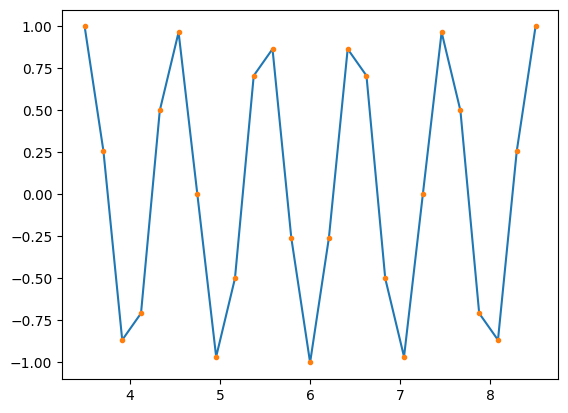

In [16]:
nts = [ts/3600/24 for ts in nts]

plt.plot(nts, temp)
plt.plot(nts, temp, '.')

- Observ că semnalul eșantionat la 5 ore nu mai reproduce sinusoida originală.
- Forma sinusului este distorsionată.
- Pe grafic nu mai putem obtine temperatura acurata.

f) Creați un nou grafic în care afișați eșantioanele generate la subpunctul precedent folosind, de data aceasta, `plt.stem()`. Adăugați pe acest grafic, cu alte culori, sinusoida și eșantioanele de la subpunctul (c).

<StemContainer object of 3 artists>

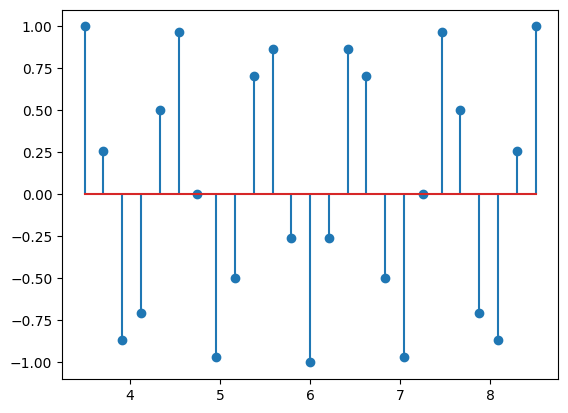

In [17]:
plt.stem(nts, temp)

## Exercițiul 2

Generați și afișați grafic o sinusoidă de frecvență și fază aleasă de voi, dar ale cărei valori minime și maxime (atinse) să fie 3, respectiv 7.
     

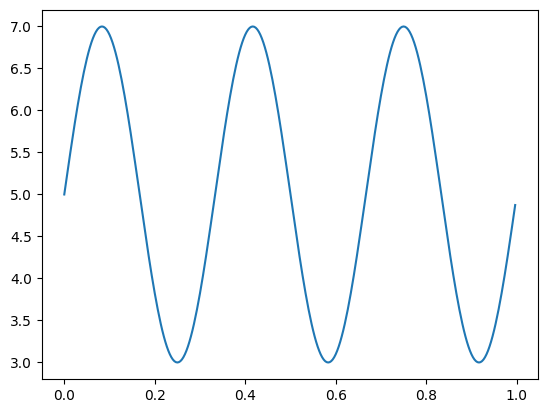

In [37]:
minim = 3
maxim = 7
faza = 0

amp = (maxim-minim) / 2
offset = minim + amp

start, stop = 0, 1
fr = 3
fs = fr*100
nts = np.arange(start, stop, 1/fs)

sin = offset + amp * np.sin(2*PI * nts* fr + faza)

plt.plot(nts, sin)

## Exercițiul 3

Calculați frecvența optimă (cea mai eficientă) de eșantionare sub-Nyquist pentru un semnal de bandă $B = 10 \, \text{Hz}$ centrat în jurul lui $f_c = 90 \, \text{Hz}$ pentru următoarele 3 valori posibile ale numărului de replici: a) m = 1, b) m = 2, c) m = 4.

In [39]:
B = 10
fc = 90

In [40]:
# a)
m = 1
(2*fc-B)/m

170.0

In [43]:
#b)
m = 2
(2*fc-B)/m

85.0

In [42]:
#c)
m = 4
(2*fc-B)/m

42.5

## Exercițiul 4

Puterea unui semnal este $P_{semnal} = 90 \, \text{dB}$. Se cunoaște raportul semnal-zgomot, $\text{SNR}_{\text{dB}} = 80 \, \text{dB}$. Care este puterea zgomotului?

**Indicație:** deoarece nu știți puterea de referință față de care se măsoară aceste puteri în decibeli, ar trebui să găsiți răspunsul fără a face conversia în watts.

In [ ]:
P_semnal = 90
SNR_db = 80
print(P_semnal - SNR_db, "db")

1.125 db
